In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [ ]:
@staticmethod
def factor(df):
    '''衡量平均交易量
    计算每笔交易的平均成交量，反映市场交易规模的大小，指示机构或散户活动。
    '''
    average_trade_size = df['volume'] / df['trade_count']
    return average_trade_size

# 测试因子表现


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.016450
   Rank_IC (Spearman): 0.005736
📊 信息比率:
   IR: 0.668360
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 131032
   因子列: factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


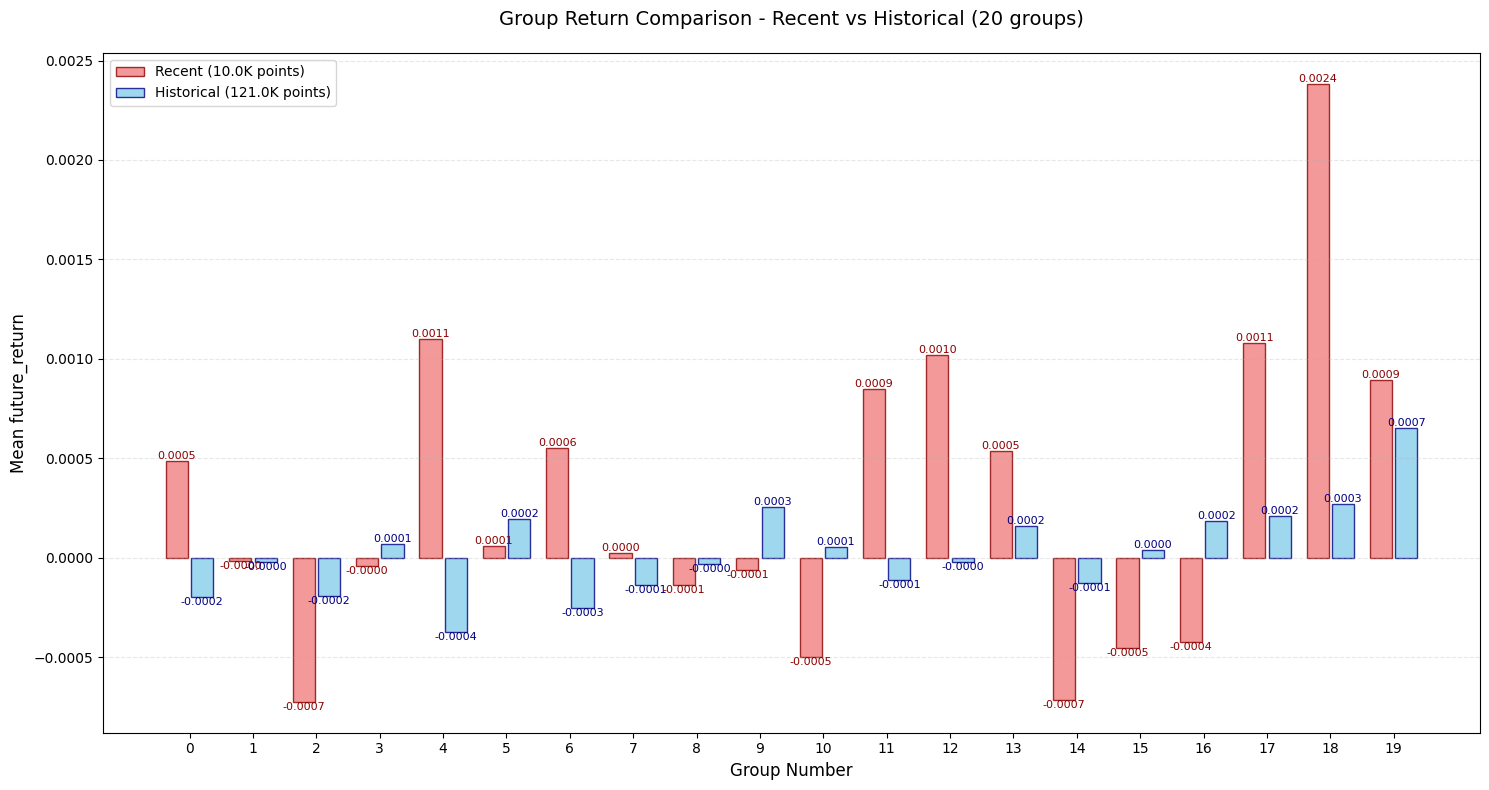

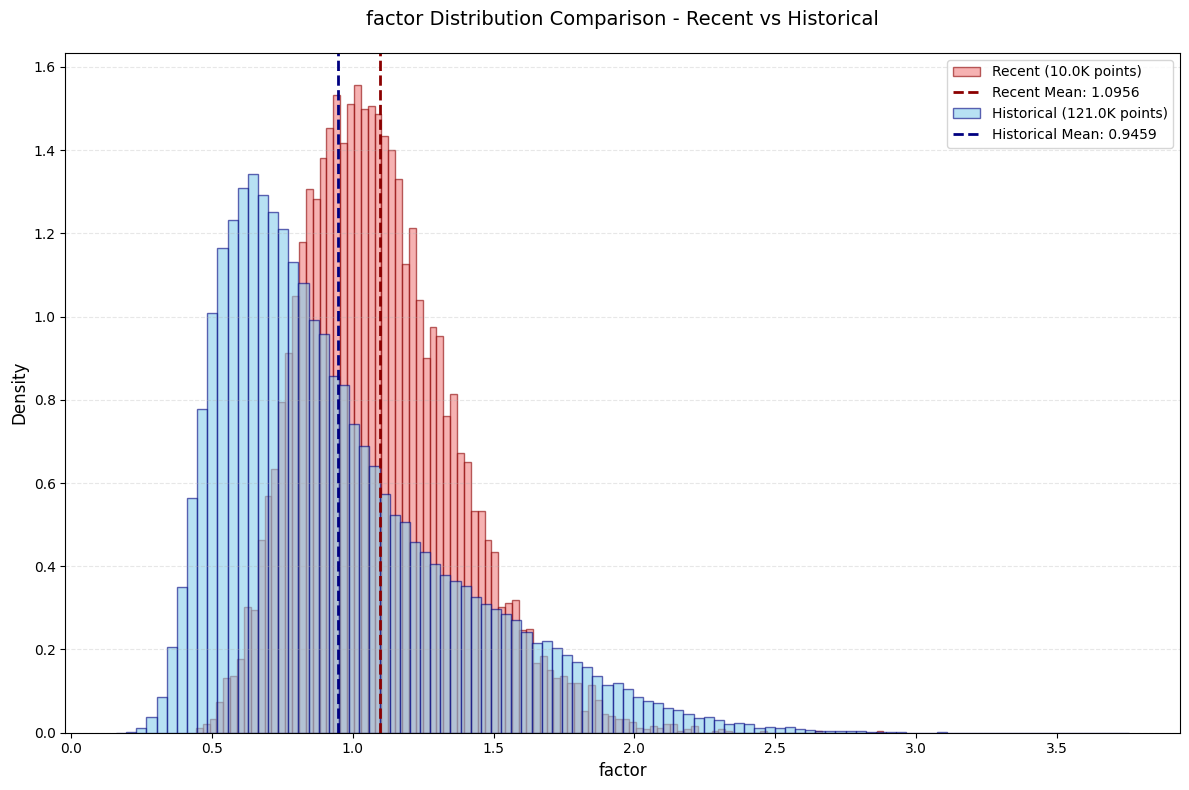

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [7]:
evaluator.set_factor(
    factor_func=factor,
    factor_name='factor'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

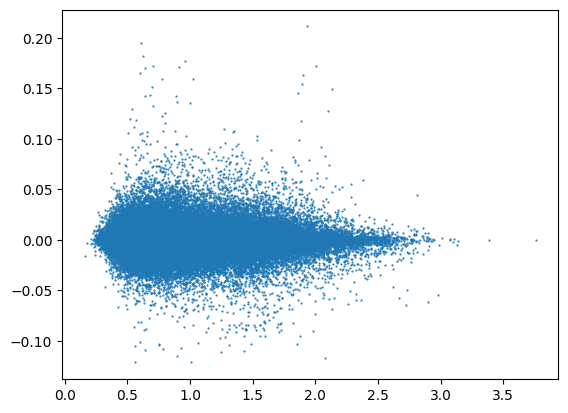

In [8]:
import matplotlib.pyplot as plt
plt.scatter(factor(df),df['close'].pct_change(-10), s=0.3)

In [9]:
result['information_ratio']['group_correlations']
# 这表示不同分组之间的相关性，通常用于评估因子在不同市场状态下的表现一致性。
# 如果相关性较高，说明因子在不同市场状态下表现一致；如果相关性较低，说明因子在不同市场状态下表现差异较大。

[0.008467481680409032,
 -0.0021957780248483922,
 0.013171379751786047,
 0.013316455592667996,
 0.011206786863419712,
 0.0034893032729560554,
 -0.005160200031790915,
 -0.010830838518512966,
 0.013344637560871998,
 0.03196879791386348]

In [10]:
print(result)

{'correlation_analysis': {'IC': 0.016449649715098817, 'Rank_IC': 0.005736075053802341}, 'information_ratio': {'IR': 0.6683601574808501, 'group_correlations': [0.008467481680409032, -0.0021957780248483922, 0.013171379751786047, 0.013316455592667996, 0.011206786863419712, 0.0034893032729560554, -0.005160200031790915, -0.010830838518512966, 0.013344637560871998, 0.03196879791386348], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0       0.1595   0.4597    0.4051      -0.0002      0.0093   6552
1       0.4597   0.5181    0.4909       0.0000      0.0102   6552
2       0.5181   0.5640    0.5416      -0.0001      0.0107   6551
3       0.5640   0.6067    0.5858      -0.0002      0.0112   6552
4       0.6067   0.6467    0.6269      -0.0002      0.0118   6551
5       0.6467   0.6863    0.6665       0.0002      0.0113   6552
6       0.6863   0.7278    0.7072    